In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import fft

In [2]:
#Aperture function for a slit as specified in core task 1
def aperture(x,d):
  aperture=[0]*len(x)

  for i in range(len(x)):

    if np.abs(x[i])<d/2:
     aperture[i]=1

    else:
     aperture[i]=0

  return aperture


In [3]:
def pattern_generator(aperture, L: float, D, d, Lambda, N: float):
  """aperture-the paerture function
     L-size of aperture in mm
     D-distance to screen in mm
     Lambda-wavelengt in mm
     N-number of sampling points on the aperture"""

  #Fourier transformation of the aperture with the built in FFT
  waveform = fft.fftshift(fft.fft(aperture))
  intensity=np.abs(waveform)**2
  intensity = intensity/np.max(intensity)

  #Calculation proper lenght scale for the distance on the screen
  omega=Lambda* D * fft.fftshift(fft.fftfreq(N, L/N))

  return [intensity, omega]


(-25.0, 25.0)

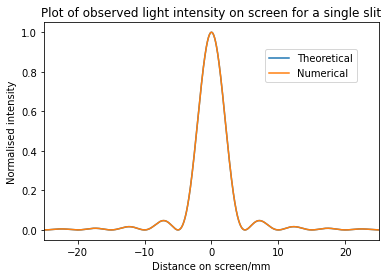

In [14]:
#Values as specified in the problem in mm
x=np.linspace(-25,25, 100000)
N=len(x)
L=50
d=0.1
D=1000
delta=1.0*L/N
Lambda=5*10**(-4)

#omega is the proper lenghtscale
intensity, omega = pattern_generator (aperture(x,d), L, D, d, Lambda, N)

#Calculation the theoretical intensity
intensity_theo=(np.sinc(omega*d/(Lambda*D)))**2

#Plotting theoretical vs numerical intensity
fig, ax1 = plt.subplots()
ax1.plot(omega, intensity_theo, label="Theoretical")
ax1.plot(omega, intensity, label="Numerical")
ax1.set_xlabel("Distance on screen/mm")
ax1.set_ylabel("Normalised intensity")
ax1.set_title("Plot of observed light intensity on screen for a single slit")
ax1.legend(loc="upper right", bbox_to_anchor=(0.95, 0.9))
plt.xlim([-25, 25])


In core task 1 we fourier transformed the function of the aperture and compared the result to the known theoretical solution for a single slit. We see both solutions fit well with each other

(-380.0, 380.0)

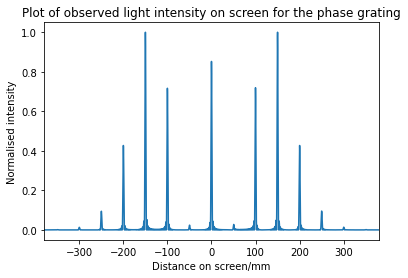

In [15]:
#New values for this part
d2=2.0
D2=10000

#Aperture function for core task 2 as given in the notes
def aperture2(x,d):
  aperture=np.ones(len(x)) * (0+0j)

  for i in range(len(x)):

    if np.abs(x[i])<d/2:
     aperture[i]=1.0 * np.exp(1j* 8.0/2.0 * np.sin(2.0*np.pi*x[i]/0.1))

    else:
     aperture[i]=0+0j

  return aperture

#Intensity is the value of the intensity on the screen and omega is the proper lenghtscale
intensity2, omega2 = pattern_generator (aperture2(x,d2), L, D2, d, Lambda, N)

fig, ax1 = plt.subplots()
ax1.plot(omega2, intensity2)
ax1.set_xlabel("Distance on screen/mm")
ax1.set_ylabel("Normalised intensity")
ax1.set_title("Plot of observed light intensity on screen for the phase grating")
plt.xlim([-380, 380])


  

The diffraction grating produces very sharp peaks every 50mm, indication occuring resonances with different sthrenghts at these peaks.

(-18.0, 18.0)

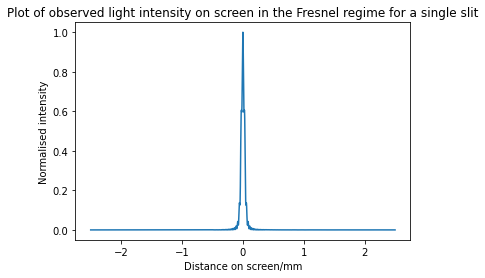

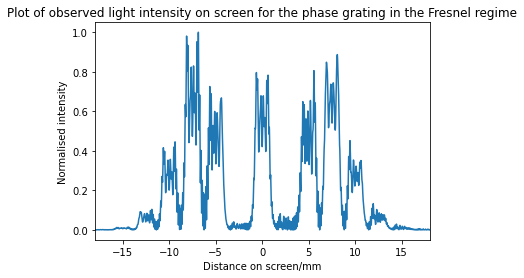

In [16]:
def fresnel_pattern_generator(aperture, L: float, D, d, Lambda, N: float):
#Same as fraunhoffer but has a correction term added

  aperture_mod=aperture* np.exp(1j*2.0 * np.pi / Lambda*x**2/(2.0*D))

  waveform = fft.fftshift(fft.fft(aperture_mod))
  intensity=np.abs(waveform)**2
  intensity = intensity/np.max(intensity)


  omega=Lambda* D * fft.fftshift(fft.fftfreq(N, L/N))

  return [intensity, omega]


#Fresnel regime for the single slit
D3=5
intensity3, omega3 = fresnel_pattern_generator (aperture(x,d), L, D3, d, Lambda, N)

#Plotting
fig, ax1 = plt.subplots()
ax1.plot(omega3, intensity3)
ax1.set_xlabel("Distance on screen/mm")
ax1.set_ylabel("Normalised intensity")
ax1.set_title("Plot of observed light intensity on screen in the Fresnel regime for a single slit")


#Fresnel slit for the phase aperture from core task 2
D4=500
intensity4, omega4 = fresnel_pattern_generator (aperture2(x,d2), L, D4, d, Lambda, N)

fig, ax1 = plt.subplots()
ax1.plot(omega4, intensity4)
ax1.set_xlabel("Distance on screen/mm")
ax1.set_ylabel("Normalised intensity")
ax1.set_title("Plot of observed light intensity on screen for the phase grating in the Fresnel regime")
plt.xlim([-18,18])




The first plot looks sensible and is in line with plots seen in 1B OWO. The second plot shows lack of symetry and quite a complicated, high frequency behavior. This is to be expected as the grading is antisymetric and produces narrow resonaces as seen in the previous part

(-0.3, 0.3)

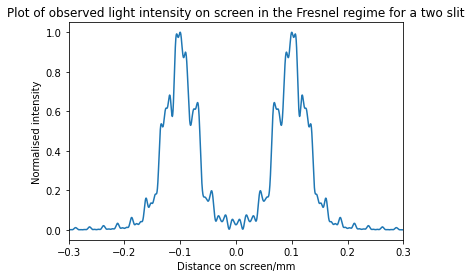

In [10]:
b=0.2

#Aperture function for 2 slits, where b is the spacing between centers
def aperture_2_slits(x,d):
  aperture=[0]*len(x)
  #The 2 clauses are <left slit> OR <right slit>
  for i in range(len(x)):

    if -b/2.0-d/2.0 < x[i] < -b/2.0+d/2.0 or b/2.0-d/2.0 < x[i] < b/2.0+d/2.0 :
     aperture[i]=1

    else:
     aperture[i]=0

  return aperture

intensity5, omega5 = fresnel_pattern_generator (aperture_2_slits(x,d), L, D3, d, Lambda, N)

#Plotting
fig, ax1 = plt.subplots()
ax1.plot(omega5, intensity5)
ax1.set_xlabel("Distance on screen/mm")
ax1.set_ylabel("Normalised intensity")
ax1.set_title("Plot of observed light intensity on screen in the Fresnel regime for two slits")
plt.xlim([-0.3,0.3])


(-0.4, 0.4)

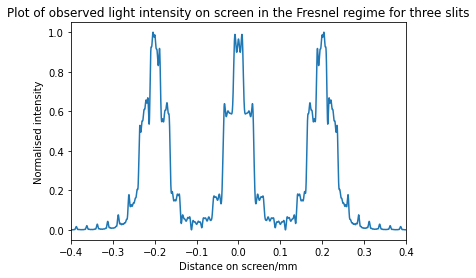

In [17]:
def aperture_3_slits(x,d):
  aperture=[0]*len(x)

  for i in range(len(x)):
    #The 3 clauses are <left slit> OR <central slit> OR <right slit>
    if -b-d/2.0 < x[i] < -b+d/2.0 or -d/2.0 < x[i] < d/2.0 or b- d/2.0 < x[i] < b+d/2.0:
     aperture[i]=1

    else:
     aperture[i]=0

  return aperture


intensity6, omega6 = fresnel_pattern_generator (aperture_3_slits(x,d), L, D3, d, Lambda, N)

fig, ax1 = plt.subplots()
ax1.plot(omega6, intensity6)
ax1.set_xlabel("Distance on screen/mm")
ax1.set_ylabel("Normalised intensity")
ax1.set_title("Plot of observed light intensity on screen in the Fresnel regime for three slits")
plt.xlim([-0.4,0.4])


By editing the aperture functions to be 2 and 3 slits respectiveely and using the fresnel diffraction function, we obtained the patters